# Tarea 2

In [1]:
#Importacion de librerias
#import IPython
#app = IPython.Application.instance()
#app.kernel.do_shutdown(True) 
#%matplotlib notebook
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'ipympl'

1.**Estabilidad I:** Usando el código de clase, estudie la estabilidad de los algoritmo Runge-kutta de tercer y cuarto orden. Realice las graficas y suposiciones que considere necesarias.

In [3]:
def fc(z):
    return 1j*z

In [4]:
def ComplexEuler():
    global theta
    global h_
    global f
    
    theta += h_
    f += h_*fc(f)

In [5]:
def ComplexEuler2():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+h_*k1)
    
    f += 0.5*h_*(k1+k2)

In [6]:
def ComplexEuler3():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+0.5*h_*k1)
    k3 = fc(f-h_*k1+2*h_*k2)
    
    f += (1/6)*h_*(k1+4*k2+k3)

In [7]:
def ComplexEuler4():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+0.5*h_*k1)
    k3 = fc(f+0.5*h_*k2)
    k4 = fc(f+k3*h_)
    
    f += (1/6)*h_*(k1+2*k2+2*k3+k4)

In [8]:
theta = 0.

N = 18
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion1 = np.array([theta,f])

for i in range(N):
    ComplexEuler()
    Solucion1 = np.vstack([Solucion1, np.array([theta,f])])

In [9]:
theta = 0.
f=1

Solucion2 = np.array([theta,f])

for i in range(N):
    ComplexEuler2()
    Solucion2 = np.vstack([Solucion2, np.array([theta,f])])

In [10]:
theta = 0.
f=1

Solucion3 = np.array([theta,f])

for i in range(N):
    ComplexEuler3()
    Solucion3 = np.vstack([Solucion3, np.array([theta,f])])

In [11]:
theta = 0.
f=1

Solucion4 = np.array([theta,f])

for i in range(N):
    ComplexEuler4()
    Solucion4 = np.vstack([Solucion4, np.array([theta,f])])

<IPython.core.display.Javascript object>


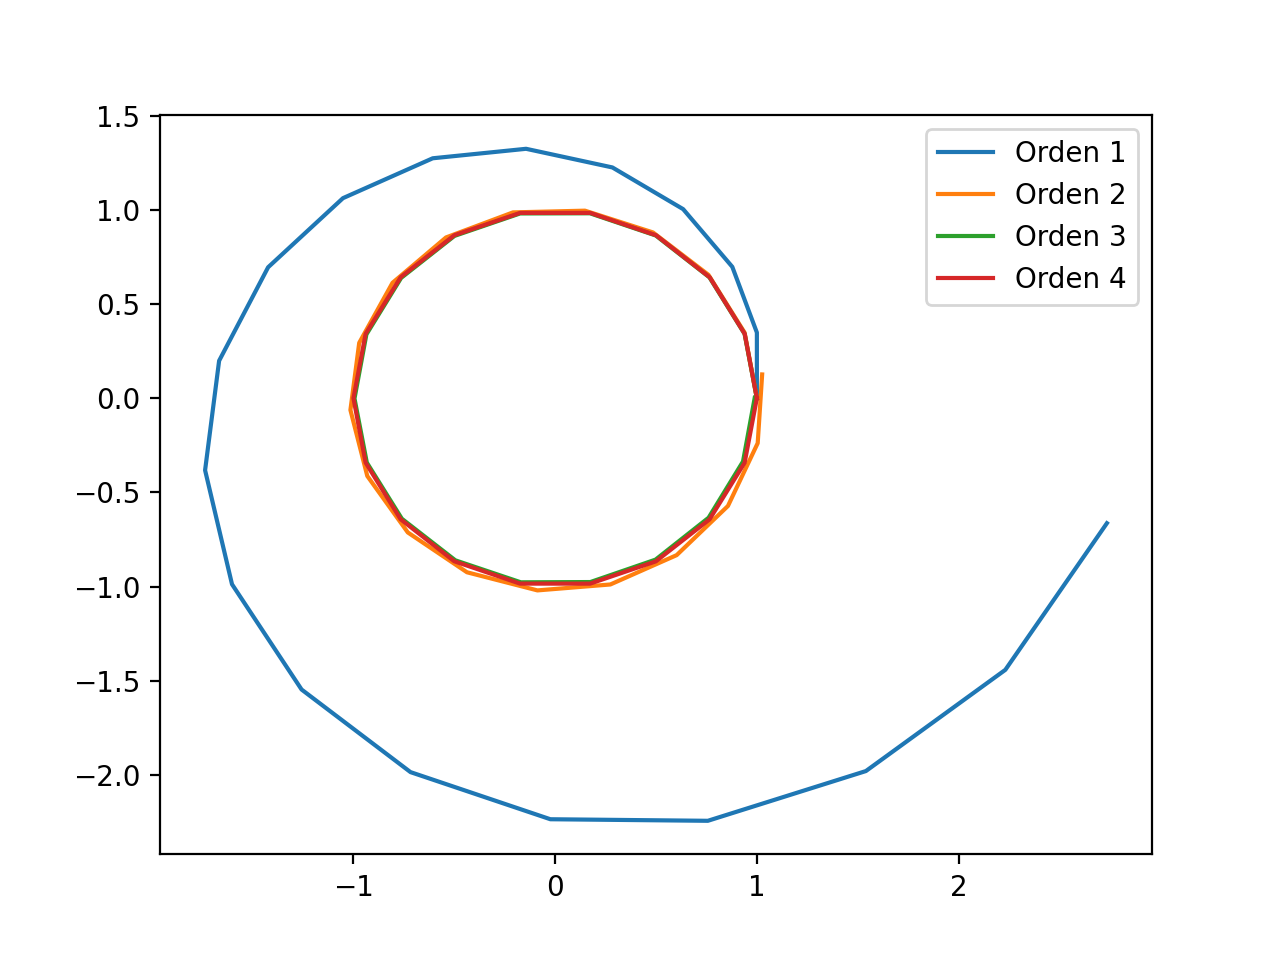

In [12]:
Re = np.real(Solucion1[:,1])
Im = np.imag(Solucion1[:,1])

Re2 = np.real(Solucion2[:,1])
Im2 = np.imag(Solucion2[:,1])

Re3 = np.real(Solucion3[:,1])
Im3 = np.imag(Solucion3[:,1])

Re4 = np.real(Solucion4[:,1])
Im4 = np.imag(Solucion4[:,1])


plt.plot(Re,Im,label="Orden 1")
plt.plot(Re2,Im2,label="Orden 2")
plt.plot(Re3,Im3,label="Orden 3")
plt.plot(Re4,Im4,label="Orden 4")
plt.legend(loc='upper right')

2. **Estabilidad II:** Para el algoritmo de Verlet:

a) Muestre que el error del método está descrito por:  $\epsilon_{n+1} - 2(1-R)\epsilon_n + \epsilon_{n-1} = 0$



Partiendo de la fórmula interativa de la posición:

$\vec{r}_{n+1} = 2\vec{r}_n - \vec{r}_{n-1} + \vec{a}(\vec{r}_n)h^2$

Añadiendo el error asociado a cada $\vec{r}$:

$\vec{r}_{n+1} + \epsilon_{n+1} = 2\vec{r}_n + 2\epsilon_n - \vec{r}_{n-1} - \epsilon_{n-1} + \vec{a}(\vec{r}_n + \epsilon_n)h^2$

Usando la Serie de Taylor de primer orden sobre $\vec{a}(\vec{r}_n + \epsilon_n)$, tal que $\vec{a}(\vec{r}_n + \epsilon_n) \approx \vec{a}(\vec{r}_n) + \epsilon_n \vec{a}'(\vec{r}_n)$:

$\vec{r}_{n+1} + \epsilon_{n+1} = 2\vec{r}_n + 2\epsilon_n - \vec{r}_{n-1} - \epsilon_{n-1} + (\vec{a}(\vec{r}_n) + \epsilon_n \vec{a}'(\vec{r}_n))h^2$

$\vec{r}_{n+1} + \epsilon_{n+1} = 2\vec{r}_n + 2\epsilon_n - \vec{r}_{n-1} - \epsilon_{n-1} + \vec{a}_n h^2 + \epsilon_n \vec{a}_n'h^2$

Por linealidad, y sabiendo que $\vec{r}_n$ y $\epsilon_n$ son independientes, entonces es posible separarlos, tal que:

$ \epsilon_{n+1} = 2\epsilon_n - \epsilon_{n-1} + \epsilon_n \vec{a}_n'h^2$

Reorganizando:

$ \epsilon_{n+1} - (2 + \vec{a}_n'h^2)\epsilon_n + \epsilon_{n-1} = 0$



b) Para el caso de un oscilador armónico clásico muestre que $ \epsilon_{n+1} - 2(1-R) \epsilon_n + \epsilon_{n-1} = 0$

En un oscilador armónico, la fuerza está dada por:

$F = -kx$

$ma = -kx$

$a = -\frac{k}{m}x$

$a = -\omega^2 x$

Calculando su derivada:

\frac{da}{dx} = -\omega^2

Remplazando en la fórmula del error:

$ \epsilon_{n+1} - (2 - \omega^2 h^2)\epsilon_n + \epsilon_{n-1} = 0$

$ \epsilon_{n+1} - 2(1 - \frac{\omega^2 h^2}{2})\epsilon_n + \epsilon_{n-1} = 0$

$\epsilon_{n+1} - 2(1 - R)\epsilon_n + \epsilon_{n-1} = 0$


c) Usando la suposición de función potencia $\epsilon_n = \epsilon_0\lambda^n$, muestre que las raíces son $\lambda_{\pm} = 1 + R \pm \sqrt{R^2-2R}$:

Reemplazando $\epsilon_n$ en la fórmula del error del oscilador armónico:

$\epsilon_0 \lambda^{n+1} - 2(1-R)\epsilon_0 \lambda^{n} + \epsilon_0 \lambda^{n-1}=0$

$\lambda^{n+1} - 2(1-R) \lambda^{n} + \lambda^{n-1}=0$

$\lambda - 2(1-R) + \lambda^{-1}=0$

$\frac{\lambda^2 + 1}{\lambda} - 2(1-R) = 0$

$\lambda^2 - 2(1-R)\lambda + 1 = 0$

$\lambda^2 - (2-2R)\lambda + 1 = 0$

$\lambda = \frac{(2-2R) \pm \sqrt{(2-2R)^2 -4}}{2}$

$\lambda = \frac{(2-2R) \pm \sqrt{4R^2-8R}}{2}$

$\lambda_{\pm} = 1 - R \pm \sqrt{R^2 - 2R}$

d) El valor de |λ±| ≤ 1 define la estabilidad del algoritmo. Muestre que el paso de
integración debe cumplir $h \leq \frac{2}{\omega}$

Con el rango de $\lambda$ se tiene entonces que

$|1 - R \pm \sqrt{R^2 - 2R}| \leq 1$

Por lo que

$1 - R \pm \sqrt{R^2 - 2R} \leq \pm 1$

$\pm \sqrt{R^2 - 2R} \leq \pm 1 - 1 + R$

$(\pm 1 - 1 + R)^2 \geq R^2 - 2R$

$2 - (\pm 2) \pm 2R - 2R + R^2 \geq R^2 - 2R$

$2- (\pm 2) \pm 2R \leq 0$

$\pm 2R \leq (\pm 2) - 2$

$\pm h^2 \omega^2 \leq (\pm 2) - 2$

$h^2 \leq \pm \frac{\pm 2 - 2}{\omega^2}$

El paso por definición es positivo, por lo que se agarra el signo negativo para que esto tenga sentido.

$h^2 \leq - \frac{-2 - 2}{\omega^2}$

$h^2 \leq \frac{4}{\omega^2}$

$h \leq \frac{2}{\omega}$


e)

In [13]:
def oscilador(x,w):
    return -w**2*x


def verlet(f,x0,v0,t,w,h):

    x = np.zeros_like(t)
    v = np.zeros_like(t)

    x[0] = x0
    x[1] = x[0] + h*v0
    v[0] = v0
    v[1] = x[0] + h*f(x[1],w)

    for i in range(2,len(x)):
        x[i]= 2*x[i-1]-x[i-2]+ f(x[i-1],w)*h**2
        v[i] = (x[i]-x[i-2])/(2*h)
    
    return x,v


<IPython.core.display.Javascript object>


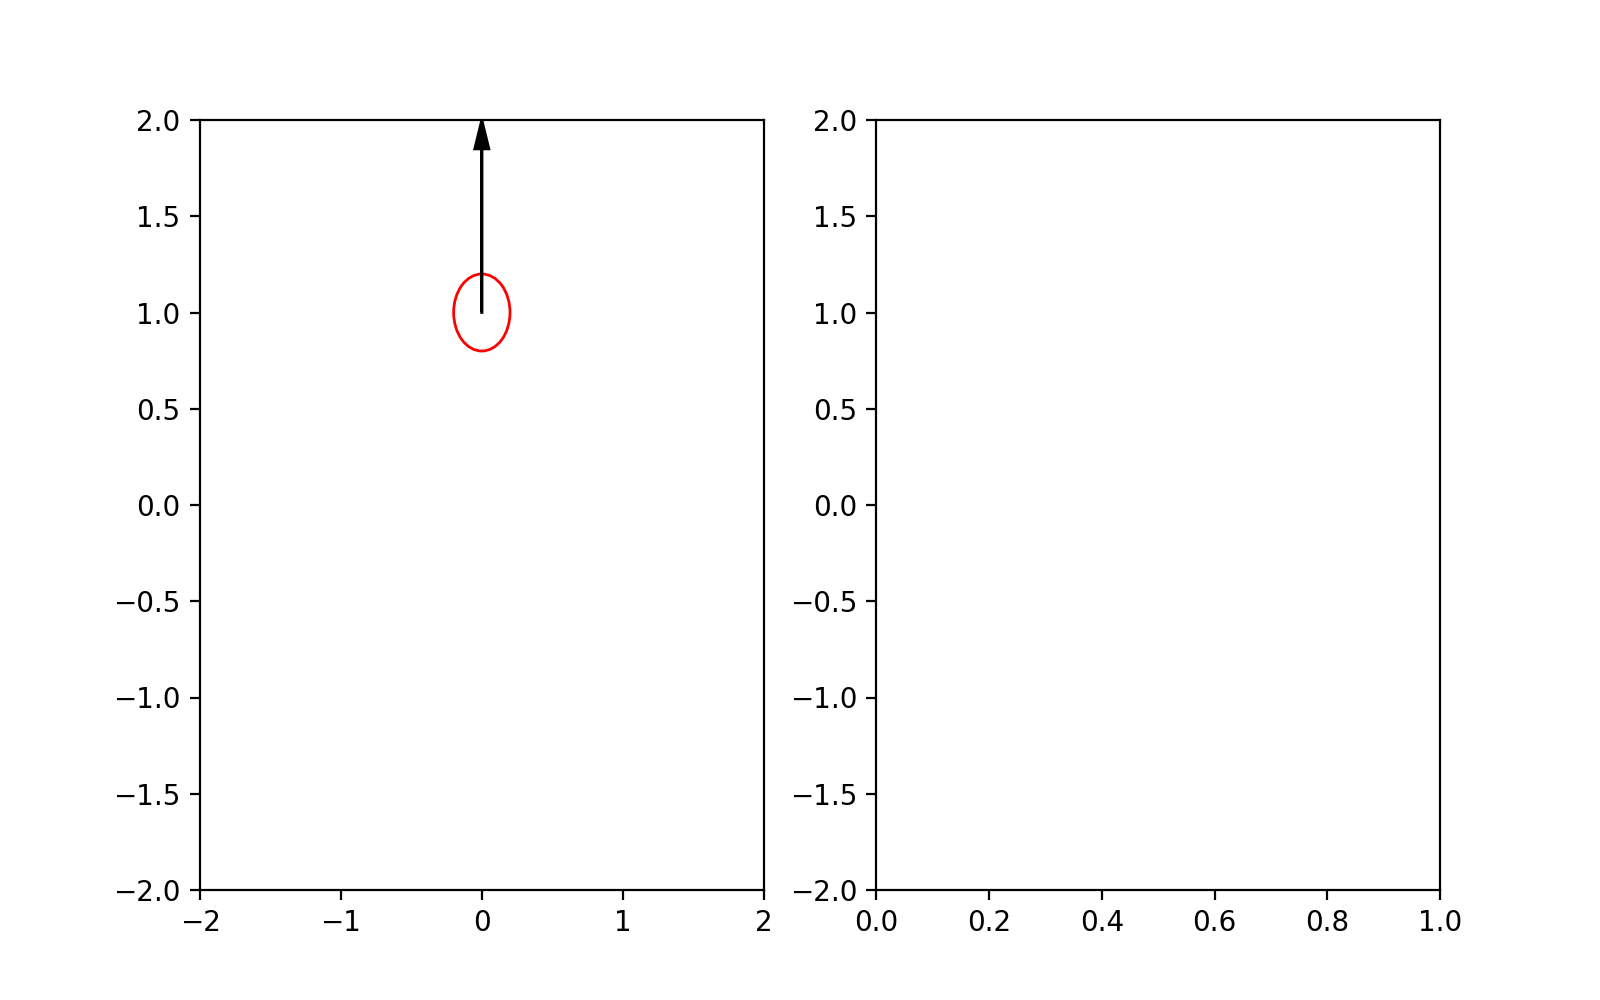

In [14]:
#COMPORTAMIENTO ESTABLE:

w = np.pi
h = 0.1
t = np.arange(0,20,h)

x0, v0 = 1, 1

x,v = verlet(oscilador, x0,v0,t,w,h)

scale=1
t = t[::scale]
x = x[::scale]
v = v[::scale]

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    ax.clear()
    ax1.clear()

    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)

    ax1.set_ylim(-2,2)
   
def Update(i):
    
    init()
    
    xi = x[i]
    vi =v[i]
    
    circle = plt.Circle((0,xi), 0.2, color='r', fill=False)
    ax.add_patch(circle)
    ax.arrow(0,xi,0,vi,color='k',head_width=0.1,length_includes_head=True)
    ax1.plot(t[0:i] , x[0:i],color="r")
       
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)



1.6466197723675813


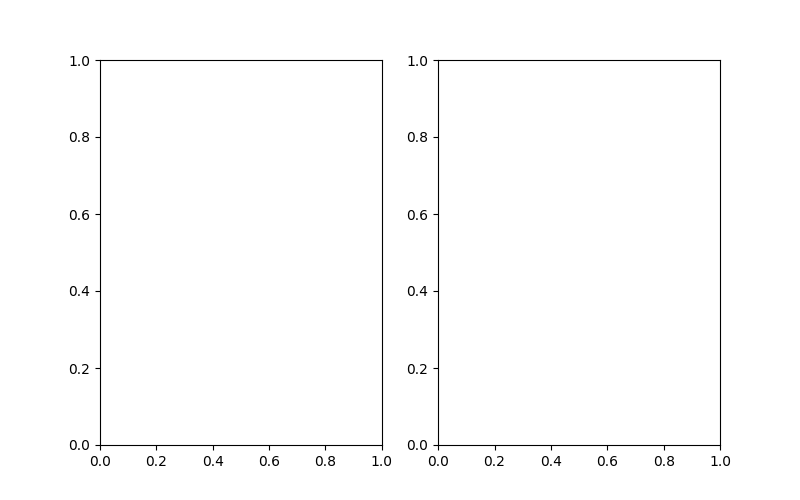

In [8]:
#COMPORTAMIENTO INESTABLE:

w = np.pi
h = 2/w + 0.01
t = np.arange(0,20,h)

x0, v0 = 1, 1

x,v = verlet(oscilador, x0,v0,t,w,h)

scale=1
t = t[::scale]
x = x[::scale]
v = v[::scale]

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    ax.clear()
    ax1.clear()

    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)

    ax1.set_ylim(-2,2)
   
def Update(i):
    
    init()
    
    xi = x[i]
    vi =v[i]
    
    circle = plt.Circle((0,xi), 0.2, color='r', fill=False)
    ax.add_patch(circle)
    ax.arrow(0,xi,0,vi,color='k',head_width=0.1,length_includes_head=True)
    ax1.plot(t[0:i] , x[0:i],color="r")
       
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)


3) Resolver analíticamente la ecuación diferencial de Riccati:
$$x^3y'=x^4y^2-2x^2y-1$$
Una solución particular esta dada por: $y_1 = x^{−2}$. Encuentre numéricamente la solución usando alguno de los métodos vistos en clase con la condición inicial $y(\sqrt{2}) = 0$.


**Parte Analítica**
$$x^3y'=x^4y^2-2x^2y-1$$
$$y'=xy^2-2x^{-1}y-x^{-3}$$
Tomando la solución de la particular, queremos que nuestra ecuación sea:
$$y = y_1 + \frac{1}{u}$$
Lo cual al derivar tenemos 
$$y' = x(x^{-2})^2-2x^{-1}(x^{-2})-x^{-3} - \frac{1}{u^2}u'$$
$$y' = x^{-3}-2x^{-3}-x^{-3} - \frac{1}{u^2}u'$$
$$y' = -2x^{-3} - \frac{1}{u^2}u'$$
$$xy^2-2x^{-1}y= -x^{-3} - \frac{1}{u^2}u'$$
$$-\frac{1}{u^2}u'=+xy^2-2x^{-1}y +x^{-3} $$
Remplazamos los valores de y con $y = x^{-2} + \frac{1}{u}$
$$-\frac{1}{u^2}u'=+x(x^{-2} + \frac{1}{u})^2-2x^{-1}(x^{-2} + \frac{1}{u}) +x^{-3} $$
$$-\frac{1}{u^2}u'=x^{-3}+2x^{-2}u^{-1}+u^{-2}-2x^{-3}-2x^{-1}u^{-1}+x^{-3} $$
$$-\frac{1}{u^2}u'=\frac{2}{xu}+\frac{x}{u^2}-2\frac{2}{xu}$$
$$u'=-x$$
Entonces, 
$$u = \int -x d x$$
$$u = -\frac{x^2}{2}+c$$
Lo cual la solución es, $$y = x^{-2} + \frac{1}{-\frac{x^2}{2}+c}$$

Con las condiciones iniciales tenemos que 
$$0 = \frac{1}{2} + \frac{1}{-1+c}$$
$$ -\frac{1}{2}(-1+c) = 1$$
$$c = -1 $$

In [92]:
N = 100
t = np.linspace(2**(1/2),10,N)

In [93]:
def solucion(t):
    return t**(-2)+(1/(-(t**2/2+1)))

In [94]:
def Ricatti(x,y):
    return x*y**2-2*x**(-1)*y-x**(-3)

In [95]:
def Euler4(t,y0,f):
    h = t[1]-t[0]
    y = np.zeros_like(t)
    y[0] = y0
    for i in range (1, len(y)):
        k1 = f(t[i-1],y[i-1])
        k2 = f(t[i-1]+0.5*h,y[i-1]+0.5*k1*h)
        k3 = f(t[i-1]+0.5*h,y[i-1]+0.5*k2*h)
        k4 = f(t[i-1]+h,y[i-1]+k3*h)
        y[i] = y[i-1]+(h/6)*(k1+2*k2+2*k3+k4)
    return y 

<IPython.core.display.Javascript object>


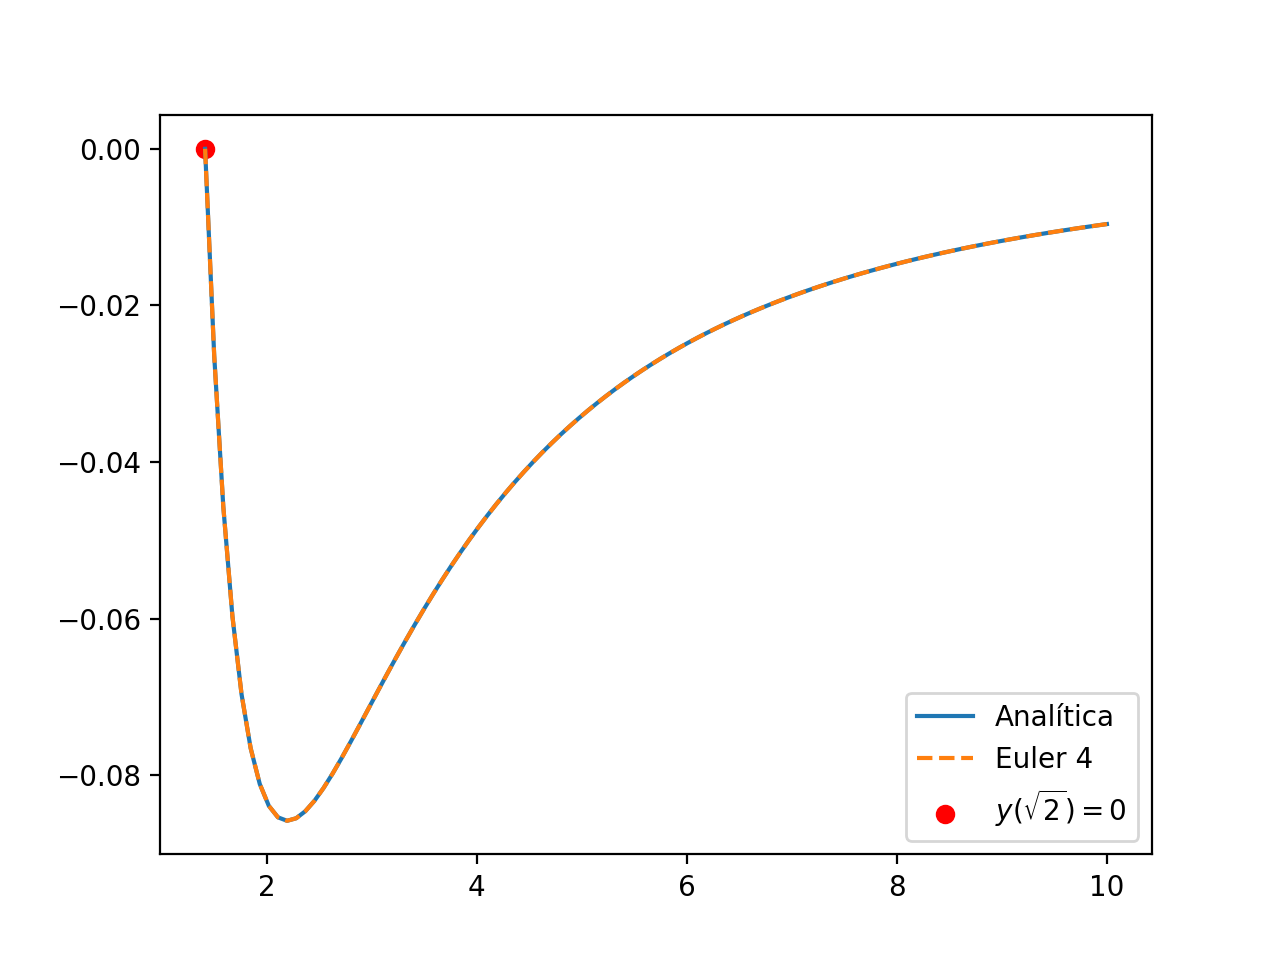

In [97]:
plt.plot(t,solucion(t), label = "Analítica")
plt.plot(t,Euler4(t,0,Ricatti), linestyle='dashed',label = "Euler 4")
plt.scatter(np.sqrt(2),solucion(np.sqrt(2)), color="red",label=r'$y(\sqrt{2})=0$')
plt.legend()

4) Resolver analíticamente la ecuación diferencial no lineal:
$$\frac{du}{dt}=u^q, t \in [0,10]$$

La solución exacta es: $u(t)=e^t$ para $q=1$ y $u(t)=(t(1−q)+1)^{\frac{1}{1-q}}$ para $q<1$ y $t(1−q)+1 > 0$.

**Para $q = 1$**

Tenemos lo siguiente, 
$$\frac{du}{dt}=u$$
$$\frac{du}{u}=\frac{dt}{1}$$
$$\int\frac{du}{u}=\int\frac{dt}{1}$$
$$ln(u)=t+c$$
$$u = e^{t+c}$$
$$u = A_0e^{t}$$
En este caso $A_0$ es igual a uno, si tenemos que nuestra condición inicial es $u(0)=1$.

**Para $q < 1$**

Para la solución hacemos lo siguiente,
$$\frac{du}{dt}=u^q$$
$$\int u^{-q} du=\int dt$$
$$\frac{u^{-q+1}}{-q+1}= t+c$$

$$u^{-q+1}= (-q+1)(t+c_2)$$
$$u= ((-q+1)t+c_3)^{\frac{1}{1-q}}$$

Teniendo en consideración nuestro valor inicial $u(0)=1$, lo cual, $c_3 = 1$. Tenemos el siguiente resultado:

$$u= ((-q+1)t+1)^{\frac{1}{1-q}}$$

En el cual, $q<1$ y $0<(-q+1)t+1$

5) Encontrar la solución numéricamente para algunos valores de q = [0., 0.2, 0.4, 0.7, 0.9, 1.].

In [98]:
q = [0,0.2,0.4,0.7,0.9,1]
N = 100
t = np.linspace(0,10,N)

def solucion(t,q):
    if q == 1:
        return np.e**t
    else:
        return ((-q+1)*t+1)**(1/(1-q))
def equation(u,q):
    du_dt = u**q
    return du_dt

In [99]:
def Euler_4(t,y0,f,q):
    h = t[1]-t[0]
    y = np.zeros_like(t)
    y[0] = y0
    for i in range (1, len(y)):
        k1 = f(y[i-1],q)
        k2 = f(y[i-1]+0.5*k1*h,q)
        k3 = f(y[i-1]+0.5*k2*h,q)
        k4 = f(y[i-1]+k3*h,q)
        y[i] = y[i-1]+(h/6)*(k1+2*k2+2*k3+k4)
    return y       

<IPython.core.display.Javascript object>


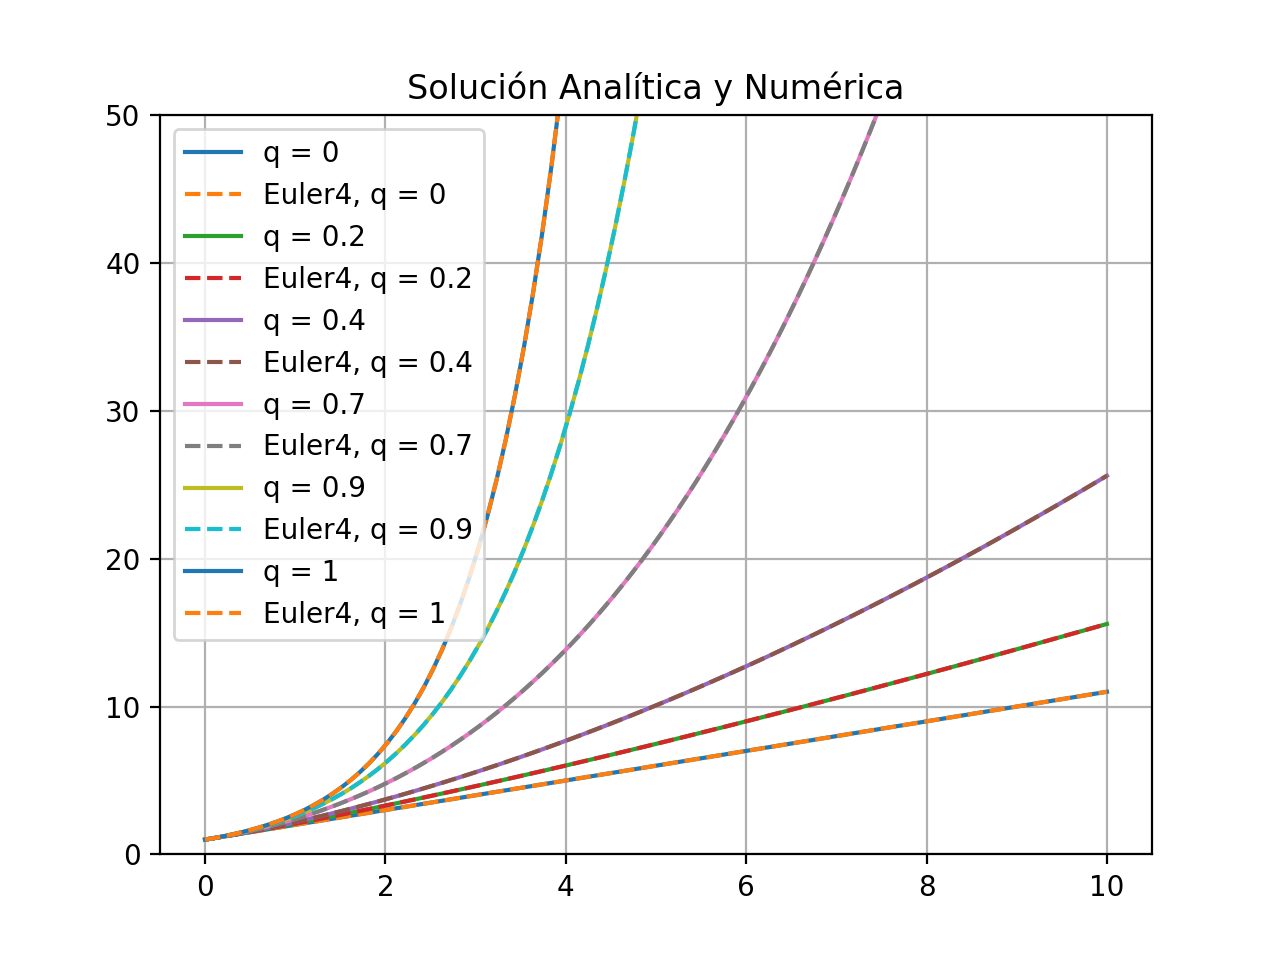

Text(0.5, 1.0, 'Solución Analítica y Numérica')

In [100]:
for i in q:
    analitic = solucion(t,i)
    aprox = Euler_4(t,1,equation,i)
    plt.plot(t, analitic, label=f'q = {i}')
    plt.plot(t,aprox, linestyle='dashed',label=f'Euler4, q = {i}')
plt.legend()
plt.ylim(0, 50)
plt.grid()
plt.title("Solución Analítica y Numérica")

6) **Precesión de la órbita de Mercurio:** Observaciones astronómicas realizadas en en el siglo XIX mostraban que el perihelio de Mercurio que es el punto más cercano al sol no era estático, por el contrario, rota lentamente alrededor del sol. La influencia de los otros planetas no respondían completamente al valor de precesión observado y el perihelio de Mercurio avanza con una velocidad de precesión cercana a 43 segundos de arco por siglo. Fue la Relatividad General de Albert Einstein la teoría que dio una respuesta satisfactoria a dicho fenómeno. Esta teoría predice un corrección a la ley de gravitación de Newton dada por:
$$\vec{F} = -\frac{GM_1M_2}{r^2}(1+\frac{\alpha}{r^2})\hat{r}$$
Para Mercurio $\alpha = 1.1 \times 10^{−8} au^2$. Dado el valor pequeñoo de $\alpha$ se requiere un alto nivel de precisión para la integración de la órbita en cada revolución. Para encontrar dicho resultado se requiere una ligera modificación al método de Verlet:
$$\vec{r}(t+\Delta t) = \vec{r}+\vec{v}\Delta t+\frac{1}{2}\vec{a}\Delta t^2$$
$$\vec{v}(t+\Delta t) = \vec{v}+\frac{\Delta t}{2}(\vec{a}(t+\Delta t)+\vec{a}(t))$$

Los parámetros de órbita para Mercurio son: $e = 0.205630$ y $a = 0.387098$. Inicializar la órbita en el afelio con:
$$\vec{r(0)}= [a(1+e),0]$$
$$\vec{v(0)}= [0,\sqrt{\frac{G(1-e)}{a(1+e)}}]$$

Demuestre las expresiones de la Ecuaciones (2.89) y (2.90). Usar un paso temporal del mismo orden de $\alpha ∼ \Delta t$ para poder medir el efecto de la precesión. Genere al menos 10 órbitas alrededor del Sol guardando en un archivo de datos el tiempo en años terrestres que tarda mercurio en llegar al perihelio y el ángulo de llegada que debe ser cercano a $180º$. Usando el archivo de datos gráfique 2 veces el ángulo de llegada vs 2 veces el tiempo en años terrestre que le toma en llegar de nuevo al perihelio.

PONER LA PARTE TEÓRICA AQUÍ

In [115]:
a = 0.387098
e = 0.205630 
G = 6.67430e-11
Delta_t = 1e-08
t = np.arange(0,2.5,Delta_t)

def acelerar(r):
    distancia = np.linalg.norm(r)
    return -r
